# Data Science - Análise de Sobrevivência - Previsão de Turnover

Complemento ao projeto de Henrique Borges (https://www.kaggle.com/henriquebas/people-analytics-turnover-python-lifelines)

25 de novembro de 2021

## 1. Definição do problema de negócio

Uma empresa necessita entender os motivos da alta taxa de *turnover* e prever quanto tempo um empregado irá permanecer antes de sair de lá.

### 1.1. Dataset

https://www.kaggle.com/davinwijaya/employee-turnover

### 1.2. Informações gerais

O *dataset* possui diversas variáveis, quais sejam:

- **stag**: Experiência do empregado. Corresponde ao tempo t de falha ou tempo de censura do estudo. Como não há um codebook do *dataset* que explique qual unidade de medida está sendo tratada, consideraremos que a unidade seja *semana*.
- **event**: Indica se o evento ocorreu no tempo t. Caso seja 1, indica falha, ou seja, o funcionário em questão deixou a empresa no tempo t. Caso seja 0, o empregado permaneceu na empresa.
- **gender**: Gênero do empregado.
- **age**: Idade do empregado.
- **industry**: Indústria de atuação do empregado.
- **profession**: Profissão do empregado.
- **traffic**: A partir de qual Canal de Recrutamento o empregado ingressou na empresa.
- **coach**: Presença de um coach (sim, não ou se foi o próprio supervisor).
- **head_gender**: Gênero do supervisor ao qual o funcionario responde.
- **greywage**: Greywage: o empregador paga apenas uma pequena quantia de salário acima do salário mínimo. White: Salário mínimo.
- **way**: Forma pela qual o empregado se desloca para o escritório.
- **extraversion**: Índice de extroversão.
- **independ**: Índice de independência.
- **selfcontrol**: Índice de autocontrole.
- **anxiety**: Índice de ansiedade.
- **novator**: Índice de inexperiência.

A coluna ***event*** é a variável que iremos analisar, que possui as seguintes classes:

0. Empregado permaneceu na empresa (ou saiu depois do término do estudo);
1. Empregado saiu da empresa durante o tempo de estudo.

## 2. Carregamento dos dados

In [1]:
# importa bibliotecas gerais
import warnings
warnings.filterwarnings('ignore')

# importa bibliotecas de preparação dos dados
import pandas as pd

# importa bibliotecas de visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# carrega os dados
dataset = pd.read_csv('turnover.csv', encoding='iso-8859-1')

## 3. Análise exploratória dos dados

### 3.1. Análise geral dos dados

Primeiramente, vamos dar uma olhada mais geral nos dados.

In [3]:
# informações gerais sobre o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [4]:
# tipos de dados de cada coluna do dataset
dataset.dtypes

stag            float64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object

In [5]:
# mostra as quinze primeiras linhas do conjunto de dados
dataset.head(15)

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
5,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
6,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
7,120.443532,1,f,28.0,Retail,HR,referal,no,m,white,bus,3.8,5.5,8.0,4.0,4.4
8,8.607803,1,f,29.0,Banks,HR,empjs,no,f,white,bus,8.6,6.9,2.6,4.0,7.5
9,4.435318,1,f,30.0,Consult,Marketing,youjs,yes,m,white,bus,5.4,5.5,3.3,7.9,8.3


In [6]:
# mostra as quinze últimas linhas do conjunto de dados
dataset.tail(15)

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
1114,94.784394,0,f,31.0,Retail,HR,referal,yes,m,white,foot,6.2,6.2,3.3,4.0,9.0
1115,94.784394,0,f,31.0,Retail,HR,referal,yes,m,white,foot,5.4,6.2,4.9,6.3,7.5
1116,59.170431,0,f,22.0,Retail,HR,youjs,yes,f,white,bus,8.6,4.8,2.6,7.1,8.3
1117,11.006160,1,m,41.0,Consult,HR,youjs,no,m,white,bus,3.8,4.1,6.4,9.4,6.0
1118,6.800821,0,m,25.0,manufacture,HR,friends,no,f,white,bus,5.4,4.8,6.4,7.1,8.3
1119,26.677618,0,f,19.0,IT,HR,youjs,yes,f,white,bus,7.0,2.6,6.4,7.1,2.1
1120,11.564682,0,m,41.0,IT,IT,youjs,no,m,white,foot,5.4,4.1,4.9,7.9,7.5
1121,53.355236,0,f,27.0,IT,HR,youjs,no,m,white,bus,3.0,5.5,6.4,6.3,4.4
1122,12.517454,0,m,48.0,manufacture,Marketing,friends,no,m,white,bus,1.4,6.9,6.4,8.7,6.0
1123,6.669405,0,f,27.0,Banks,HR,youjs,no,f,white,bus,9.4,5.5,3.3,4.0,7.5


In [7]:
# visão geral da distribuição estatística dos dados
dataset.describe()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.096597,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
# verifica o número de registros duplicados no dataset
dataset.duplicated().sum()

13

In [9]:
# verifica quais são os registros duplicados em todas as colunas do dataset
dataset[dataset.duplicated()]

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
6,8.969199,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
38,22.735113,1,f,34.0,Retail,HR,KA,no,m,white,car,5.4,5.5,4.9,4.8,4.4
39,22.735113,1,f,34.0,Retail,HR,KA,no,m,white,car,6.2,6.2,4.9,3.3,2.9
61,15.572895,1,f,24.0,Retail,HR,youjs,no,f,white,foot,6.2,7.6,3.3,3.3,6.7
144,78.685832,1,f,31.0,Banks,HR,rabrecNErab,no,f,grey,bus,3.8,4.1,7.2,8.7,2.1
273,12.024641,1,m,30.0,Retail,Sales,rabrecNErab,no,m,grey,car,5.4,4.1,4.9,6.3,6.0
345,40.312115,0,f,29.0,manufacture,HR,rabrecNErab,my head,m,white,foot,6.2,3.4,4.1,7.9,7.5
462,1.117043,1,f,54.0,Pharma,HR,rabrecNErab,no,m,white,car,4.6,8.4,5.7,4.0,4.4
691,39.227926,1,f,37.0,Retail,HR,friends,no,f,white,car,6.2,6.9,4.1,6.3,8.3
692,39.227926,1,f,37.0,Retail,HR,friends,no,f,white,car,3.8,9.1,4.9,5.6,7.5


In [10]:
# verificando se há algum valor faltante (missing) no dataset
dataset.isnull().sum().sum()

0

In [11]:
# identificamos as variáveis categóricas do conjunto de dados
df_objects = dataset.select_dtypes(include=['object'])
print(df_objects.columns.values,'\n')

['gender' 'industry' 'profession' 'traffic' 'coach' 'head_gender'
 'greywage' 'way'] 



In [12]:
# identificamos os valores únicos de cada variável categórica
for i in df_objects.columns.values:
    print(i,':', dataset[i].unique(),'\n')

gender : ['m' 'f'] 

industry : ['Banks' 'PowerGeneration' 'Retail' 'manufacture' 'Consult' 'State' 'etc'
 'Building' 'IT' ' HoReCa' 'Telecom' 'Pharma' 'Mining' 'transport'
 'Agriculture' 'RealEstate'] 

profession : ['HR' 'Commercial' 'Marketing' 'etc' 'Sales' 'BusinessDevelopment'
 'Finanñe' 'Teaching' 'manage' 'IT' 'Law' 'Consult' 'Engineer' 'PR'
 'Accounting'] 

traffic : ['rabrecNErab' 'empjs' 'youjs' 'referal' 'advert' 'KA' 'recNErab'
 'friends'] 

coach : ['no' 'yes' 'my head'] 

head_gender : ['f' 'm'] 

greywage : ['white' 'grey'] 

way : ['bus' 'car' 'foot'] 



In [13]:
# identificamos as variáveis numéricas do conjunto de dados
df_numerical = dataset.select_dtypes(exclude=['object'])
print(df_numerical.columns.values,'\n')

['stag' 'event' 'age' 'extraversion' 'independ' 'selfcontrol' 'anxiety'
 'novator'] 



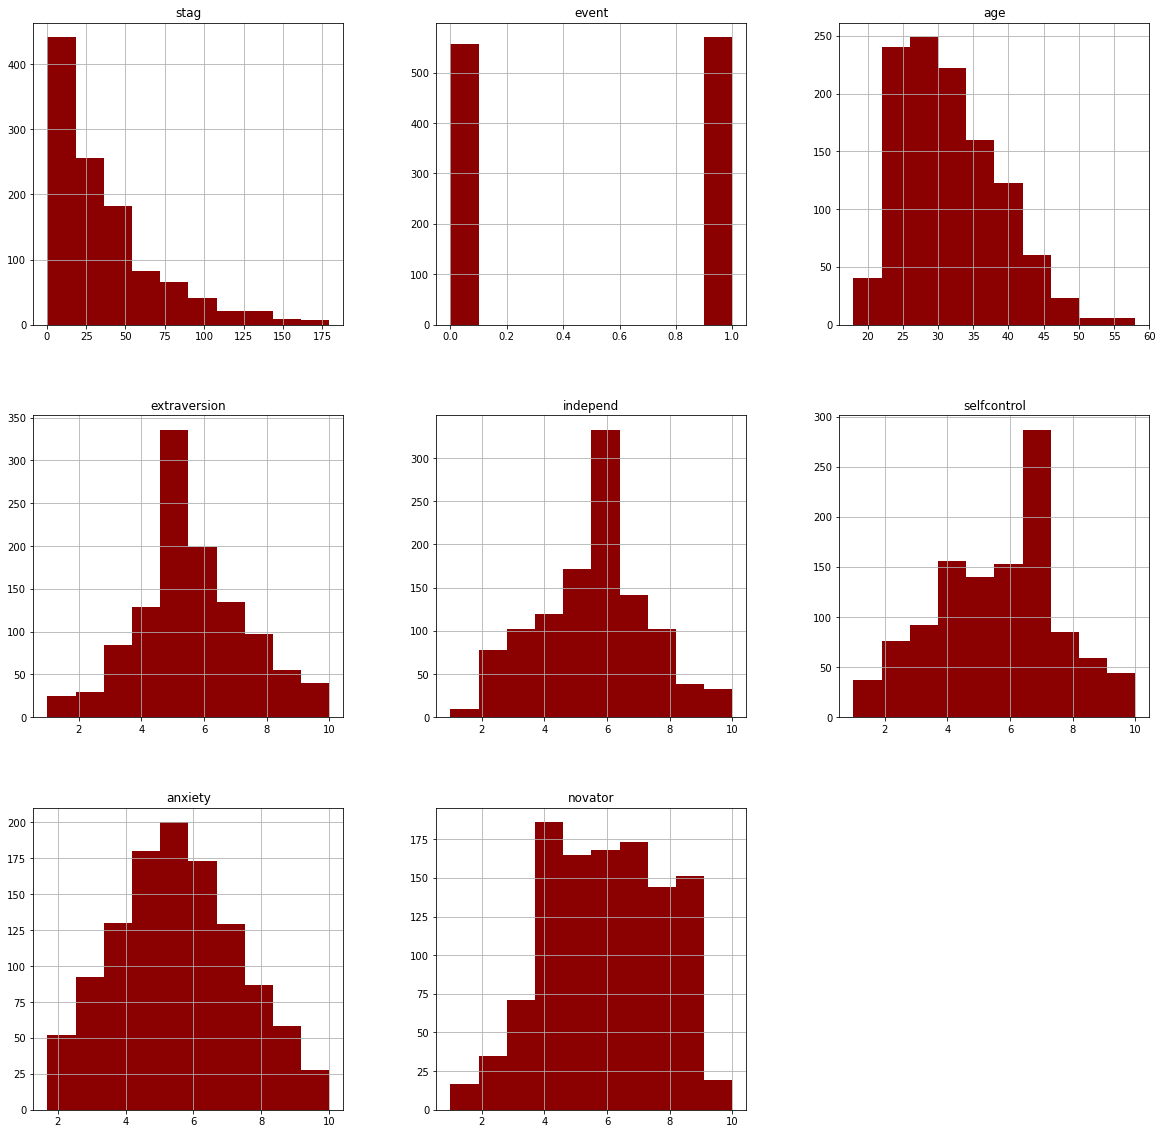

In [14]:
# histograma dos dados numéricos
num_bins = 10
histograma = dataset.hist(bins=num_bins, figsize=(20,20), color='darkred')

Observando as informações acima, podemos dizer que:
- O *dataset* conta com **1.129** registros e **16** variáveis, sendo **7** do tipo *float* e **1** do tipo *int* e **8** do tipo object.
- Existem **13** registros duplicados.
- Não existem valores *missing*.
- A média de idade dos empregados é de aproximadamente **31** anos.
- A média de tempo até o abandono da empresa (ou até a censura do estudo) é de aproximadamente **37** semanas.

### 3.2. Análise estatística dos dados

Vamos começar analisando a rotatividade dos empregados.

In [15]:
# verificação da rotatividade de empregados
event = dataset['event'].value_counts()
percent = [round(i*100/event.sum(),1) for i in dataset['event'].value_counts()]
print(event,'\n')
print('Empregados que saíram da empresa: {}%'.format(percent[0]))
print('Empregados que permaneceram na empresa: {}%'.format(percent[1]))

1    571
0    558
Name: event, dtype: int64 

Empregados que saíram da empresa: 50.6%
Empregados que permaneceram na empresa: 49.4%


Verificamos que a maioria dos empregados preferem sair da empresa a permanecer (50,6%).

Vamos ver, então, as médias dos valores numéricos para cada uma das opções (abandono ou permanência).

In [16]:
# médias dos valores númericos agrupados pela variável analisada (event)
dataset.groupby('event').mean()

,stag,age,extraversion,independ,selfcontrol,anxiety,novator
event,,,,,,,
0,38.294819,31.411829,5.563441,5.388710,5.677419,5.774910,5.866487
1,34.998191,30.729952,5.620665,5.565324,5.518914,5.558844,5.892469


Algumas considerações gerais sobre a tabela de médias das variáveis numéricas:

- Pessoas com menor tempo de emprego estão abandonando a empresa.
- Os empregados mais extrovertidos, independentes, novatos e com menor autocontrole tendem a abandonar a empresa.
- Pessoas mais velhas tendem a permanecer na empresa.

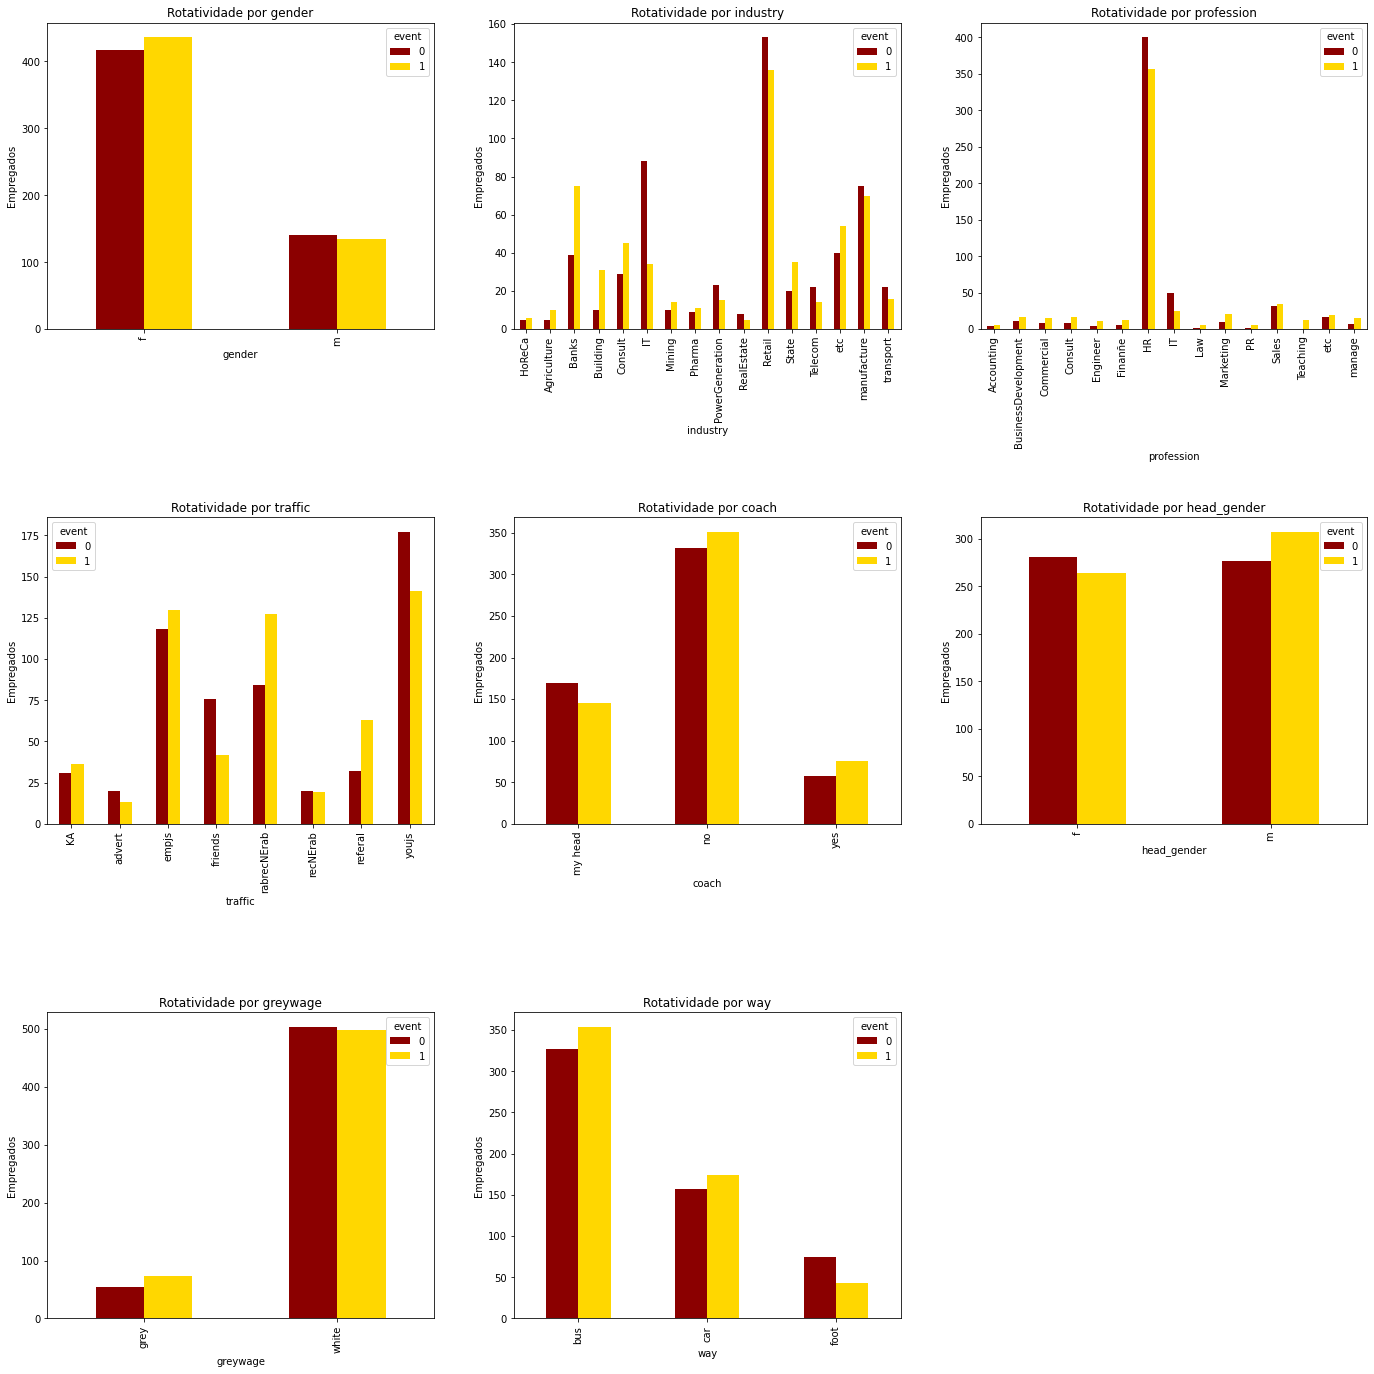

In [17]:
rows    = 3
columns = 3
c       = 1 # Inicializar contador dos gráficos

# Gráficos de barras das variáveis categóricas
fig = plt.figure(figsize=(20,20))
for i in df_objects.columns.values:

    ax = plt.subplot(rows,columns,c)
    pd.crosstab(dataset[i],dataset.event).plot(kind='bar',ax=ax, color=['darkred','gold'])
    plt.title('Rotatividade por {}'.format(i))
    plt.ylabel('Empregados')
    plt.xlabel('{}'.format(i))
    plt.tight_layout(pad=4.0)
    c = c + 1

A partir dos gráficos, podemos identificar as características das pessoas que estão saindo mais em cada variável:

- gender: f;
- industry: Banks;
- profession: Teaching;
- traffic: referal;
- coach: yes;
- head_gender: m;
- greywage: grey;
- way: car.

A seguir, uma função para verificar o percentual de abandono para uma dada variável.

In [18]:
# função que verifica o percentual de abandono para uma dada variável
def percent_event(column):
    df = pd.crosstab(column,dataset.event)
    df['%'] = (df.loc[slice(None), 1] / df.sum(axis=1)) * 100
    return df.sort_values(by='%', ascending=False)

percent_event(dataset['gender'])

event,0,1,%
gender,,,
f,417,436,51.113716
m,141,135,48.913043


Aqui plotamos um gráfico com o estimador Kaplan Meier.

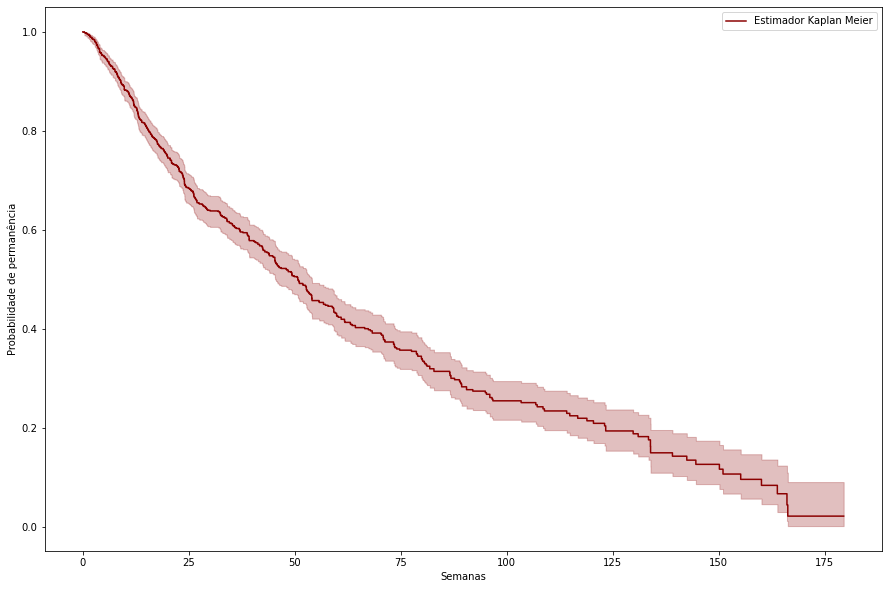

In [19]:
# importa KaplanMeierFitter da biblioteca lifelines
from lifelines import KaplanMeierFitter

# treina estimador Kaplan Meier e plota o gráfico
kmf = KaplanMeierFitter()
kmf.fit(dataset.stag, dataset.event,label='Estimador Kaplan Meier')
kmf.plot_survival_function(figsize=(15,10), color='darkred')
plt.xlabel('Semanas')
plt.ylabel('Probabilidade de permanência');

## 4. Transformação dos dados

Inicialmente, iremos excluir os registros duplicados.

A exclusão dos registros duplicados, quando estes reflem a distribuição desses dados no mundo real, poderia distorcer a probabilidade *a priori* de cada caso, afetando, principalmente, a utilização de métodos bayesianos, para os quais a frequência importa.

Se os dados de treinamento são uma amostra representativa do mundo real, então não queremos que essa distorção aconteça, porque, na verdade, estaríamos treinando um modelo para um mundo ligeiramente diferente (com probabilidades diferentes).

Contudo, considerando o fato de que são todas as 16 variáveis idênticas em cada registro, sendo que algumas refletem notas em testes com identidade de inteiros e decimais (além de todas as outras variáveis coincidentes), parece muito provável que sejam dados duplicados do mesmo empregado.

Em virtude disso, como forma de evitar viés indevido no resultado por eventual *oversampling*, iremos remover os registros duplicados.

In [20]:
# elimina os registros duplicados do dataset
df1 = dataset.drop_duplicates()

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1116 non-null   float64
 1   event         1116 non-null   int64  
 2   gender        1116 non-null   object 
 3   age           1116 non-null   float64
 4   industry      1116 non-null   object 
 5   profession    1116 non-null   object 
 6   traffic       1116 non-null   object 
 7   coach         1116 non-null   object 
 8   head_gender   1116 non-null   object 
 9   greywage      1116 non-null   object 
 10  way           1116 non-null   object 
 11  extraversion  1116 non-null   float64
 12  independ      1116 non-null   float64
 13  selfcontrol   1116 non-null   float64
 14  anxiety       1116 non-null   float64
 15  novator       1116 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 148.2+ KB


Foram excluídos **13** registros.

## 5. Análise exploratória mais específica dos dados

Agora vamos verificar a correlação entre as variáveis.

Uma coisa que temos que ter em mente é que correlação não implica causalidade. Ou seja, não podemos confundir correlação com causa e efeito.

É interessante, contudo, a análise das correlações entre variáveis porque são fenômenos aparentemente relacionados que acontecem ao mesmo tempo e podem suscitar perguntas a serem investigadas, mas elas não são, em si, respostas.

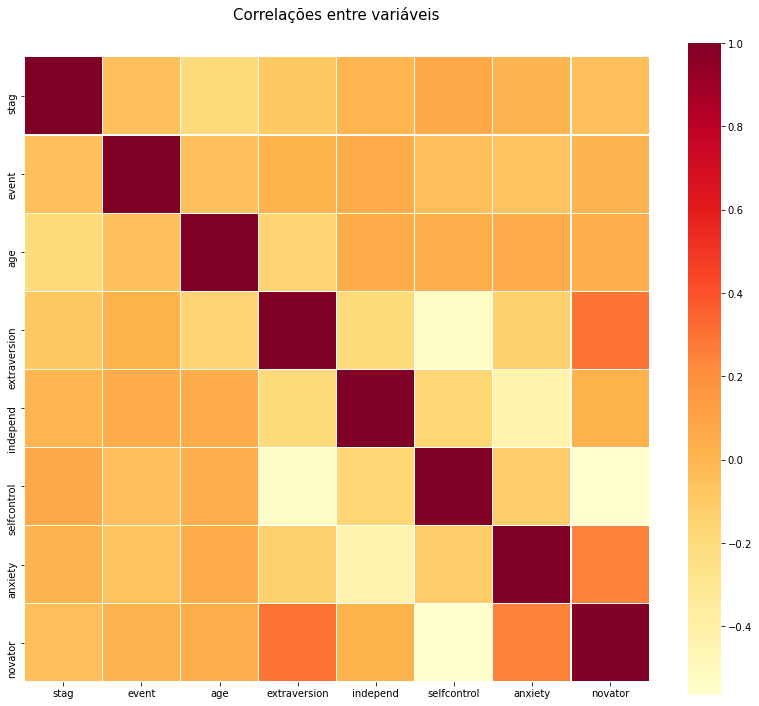

In [21]:
# plota heatmap de correlação entre dados númericos
plt.figure(figsize=(14,12))
plt.title('Correlações entre variáveis', y=1.05, size=15)
sns.heatmap(df1.corr(), cmap='YlOrRd', fmt='.2f', linewidths=0.1, vmax=1.0, square=True, linecolor='white');

O método utilizado para aferir a correlação das variáveis foi o de Pearson.

O coeficiente de correlação de Pearson mede o grau da correlação (e a direção dessa correlação, se positiva ou negativa) entre duas variáveis de escala métrica.

Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.

- *p = 1* significa uma correlação perfeita positiva entre as duas variáveis;
- *p = -1* significa uma correlação negativa perfeita entre as duas variáveis - Isto é, se uma aumenta, a outra sempre diminui;
- *p = 0* significa que as duas variáveis não dependem linearmente uma da outra. No entanto, pode existir uma dependência não linear. Assim, o resultado *p = 0* deve ser investigado por outros meios.

Podemos interpretar *p* da seguinte forma:

- 0,9 para mais ou para menos indica uma correlação muito forte;
- 0,7 a 0,9 positivo ou negativo indica uma correlação forte;
- 0,5 a 0,7 positivo ou negativo indica uma correlação moderada;
- 0,3 a 0,5 positivo ou negativo indica uma correlação fraca;
- 0 a 0,3 positivo ou negativo indica uma correlação desprezível.

Podemos perceber que não há uma correlação muito significativa entre a variável analisada e as demais variáveis do *dataset*.

Agora vamos pegar todas as variáveis categóricas e transformá-las em variáveis *dummy*.

Uma variável *dummy* é uma variável numérica usada na análise de regressão para representar subgrupos da amostra no estudo. Ela é freqüentemente usada para distinguir diferentes grupos de tratamento. No caso mais simples, [0,1] usaríamos uma variável *dummy* onde uma pessoa recebe um valor de "0" se ela está no grupo de controle ou "1" se ela está no grupo tratado.

Aqui em nosso estudo, iremos transformar as variáveis *gender*, *industry*, *profession*, *traffic*, *coach*, *head_gender*, *greywage* e *way* em variáveis *dummy*.

In [22]:
# transforma variáveis categóricas em binárias
df2 = pd.get_dummies(df1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 1128
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stag                            1116 non-null   float64
 1   event                           1116 non-null   int64  
 2   age                             1116 non-null   float64
 3   extraversion                    1116 non-null   float64
 4   independ                        1116 non-null   float64
 5   selfcontrol                     1116 non-null   float64
 6   anxiety                         1116 non-null   float64
 7   novator                         1116 non-null   float64
 8   gender_f                        1116 non-null   uint8  
 9   gender_m                        1116 non-null   uint8  
 10  industry_ HoReCa                1116 non-null   uint8  
 11  industry_Agriculture            1116 non-null   uint8  
 12  industry_Banks                  11

Agora, vamos comparar as classes das variáveis categóricas dentro da linha do tempo, relacionando-as com a variável *event*.

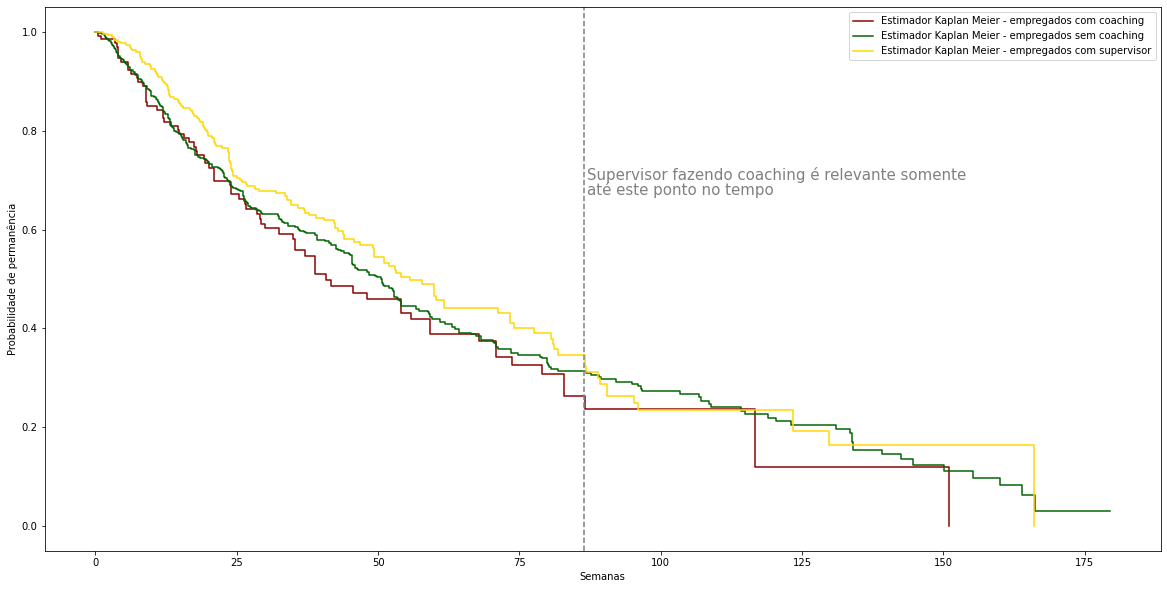

In [23]:
# treina estimador Kaplan Meier e plota o gráfico
kmf = KaplanMeierFitter()
fig, ax = plt.subplots(figsize=(20, 10))

cohort1 = df2[df2['coach_yes'] == 1]
kmf.fit(cohort1.stag, cohort1.event,label='Estimador Kaplan Meier - empregados com coaching')
kmf.plot_survival_function(ax=ax,ci_show=False, color='darkred')

cohort2 = df2[df2['coach_no'] == 1]
kmf.fit(cohort2.stag, cohort2.event,label='Estimador Kaplan Meier - empregados sem coaching')
kmf.plot_survival_function(ax=ax,ci_show=False, color='darkgreen')

cohort3 = df2[df2['coach_my head'] == 1]
kmf.fit(cohort3.stag, cohort3.event,label='Estimador Kaplan Meier - empregados com supervisor')
kmf.plot_survival_function(ax=ax,ci_show=False, color='gold')

# inclui comentário no gráfico
plt.text(87,0.7,'Supervisor fazendo coaching é relevante somente',size=15,color='gray')
plt.text(87,0.67,'até este ponto no tempo',size=15,color='gray')
plt.axvline(x=86.5,color='gray',linestyle='--')

# inclui labels nos eixos
plt.xlabel('Semanas')
plt.ylabel('Probabilidade de permanência');

Aqui nós vemos que, na empresa estudada, a presença de um *coach* externo para auxiliar os empregados nunca foi muito relevante para afetar o *turnover*.

Já se tivermos o supervisor do empregado como *coach* o resultado foi que os empregados permaneceram mais tempo na empresa.

Contudo, essa diferença foi vista somente até a semana 86 do estudo, quando o *coaching* passou a não mais fazer diferença significativa.

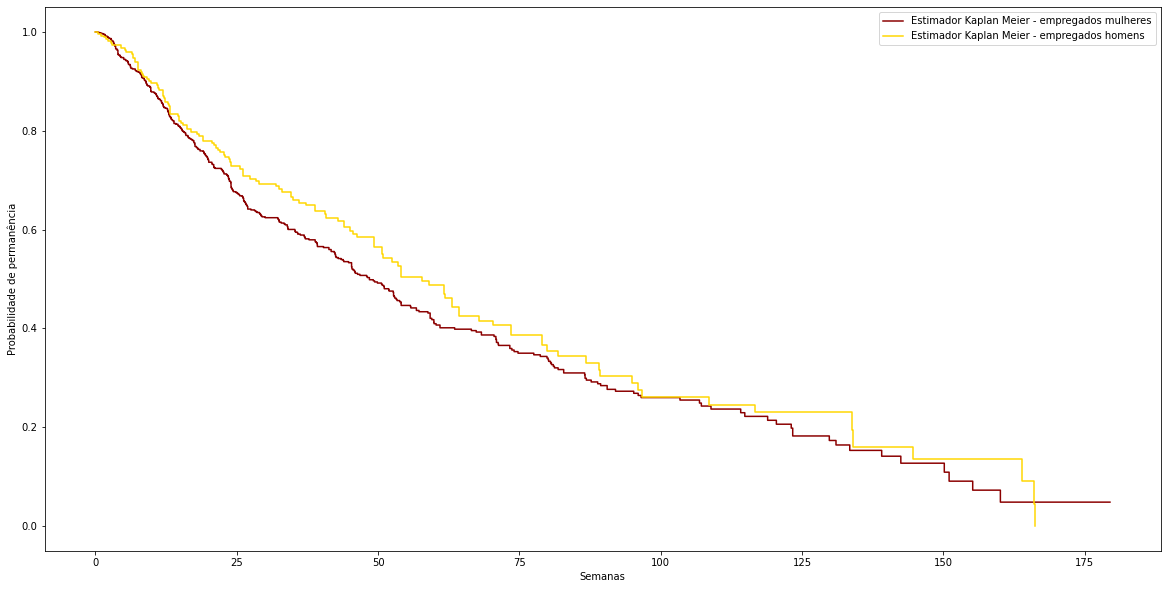

In [24]:
# treina estimador Kaplan Meier e plota o gráfico
kmf = KaplanMeierFitter()
fig, ax = plt.subplots(figsize=(20, 10))

cohort1 = df2[df2['gender_f'] == 1]
kmf.fit(cohort1.stag, cohort1.event,label='Estimador Kaplan Meier - empregados mulheres')
kmf.plot_survival_function(ax=ax,ci_show=False, color='darkred')

cohort2 = df2[df2['gender_m'] == 1]
kmf.fit(cohort2.stag, cohort2.event,label='Estimador Kaplan Meier - empregados homens')
kmf.plot_survival_function(ax=ax,ci_show=False, color='gold')

# inclui labels nos eixos
plt.xlabel('Semanas')
plt.ylabel('Probabilidade de permanência');

A partir desse gráfico, percebemos que, nesta empresa, o *turnover* é maior no grupo de empregados mulheres, em relação aos empregados homens.

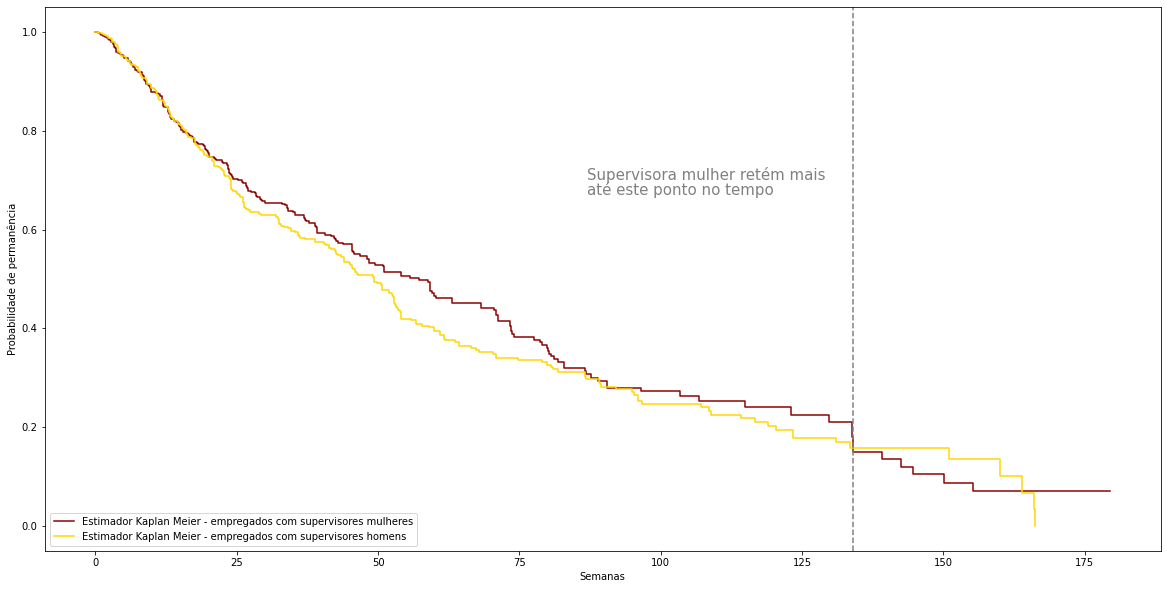

In [25]:
# treina estimador Kaplan Meier e plota o gráfico
kmf = KaplanMeierFitter()
fig, ax = plt.subplots(figsize=(20, 10))

cohort1 = df2[df2['head_gender_f'] == 1]
kmf.fit(cohort1.stag, cohort1.event,label='Estimador Kaplan Meier - empregados com supervisores mulheres')
kmf.plot_survival_function(ax=ax,ci_show=False, color='darkred')

cohort2 = df2[df2['head_gender_m'] == 1]
kmf.fit(cohort2.stag, cohort2.event,label='Estimador Kaplan Meier - empregados com supervisores homens')
kmf.plot_survival_function(ax=ax,ci_show=False, color='gold')

# inclui comentário no gráfico
plt.text(87,0.7,'Supervisora mulher retém mais',size=15,color='gray')
plt.text(87,0.67,'até este ponto no tempo',size=15,color='gray')
plt.axvline(x=134,color='gray',linestyle='--')

# inclui labels nos eixos
plt.xlabel('Semanas')
plt.ylabel('Probabilidade de permanência');

Já neste gráfico, percebemos que, nesta empresa, quando o supervisor do empregado é uma mulher, o abandono por parte dos empregados é menor até a semana 134.

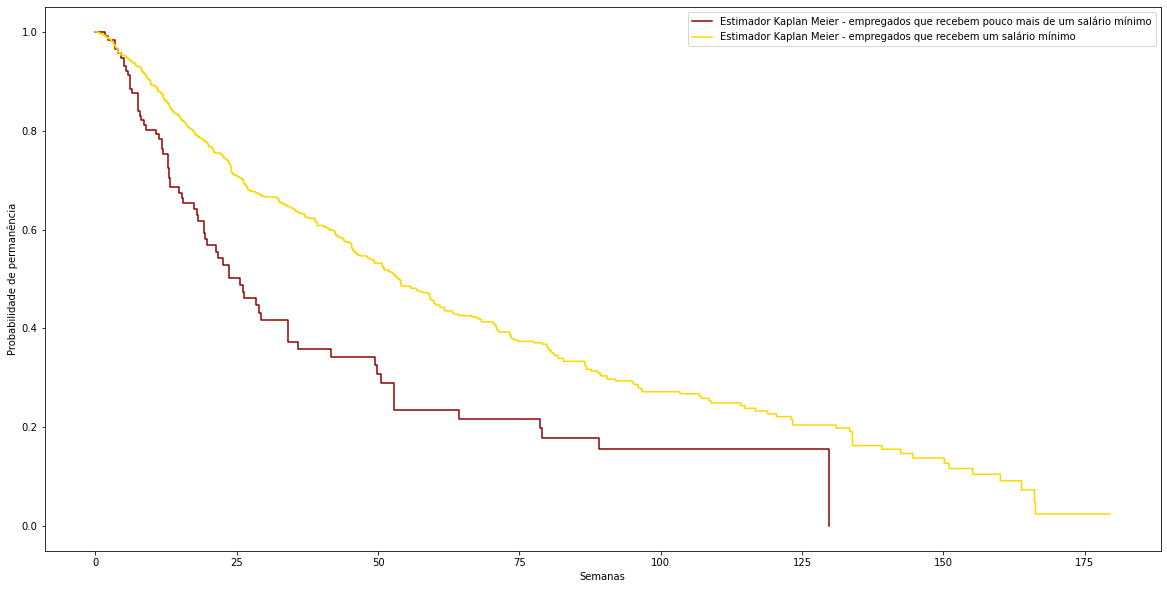

In [26]:
# treina estimador Kaplan Meier e plota o gráfico
kmf = KaplanMeierFitter()
fig, ax = plt.subplots(figsize=(20, 10))

cohort1 = df2[df2['greywage_grey'] == 1]
kmf.fit(cohort1.stag, cohort1.event,label='Estimador Kaplan Meier - empregados que recebem pouco mais de um salário mínimo')
kmf.plot_survival_function(ax=ax,ci_show=False, color='darkred')

cohort2 = df2[df2['greywage_white'] == 1]
kmf.fit(cohort2.stag, cohort2.event,label='Estimador Kaplan Meier - empregados que recebem um salário mínimo')
kmf.plot_survival_function(ax=ax,ci_show=False, color='gold')

# inclui labels nos eixos
plt.xlabel('Semanas')
plt.ylabel('Probabilidade de permanência');

Através deste gráfico, podemos afirmar que, nesta empresa, os empregados que recebem pouco mais de um salário mínimo possuem uma tendência de abandono bem maior do que aqueles que recebem um salário mínimo.

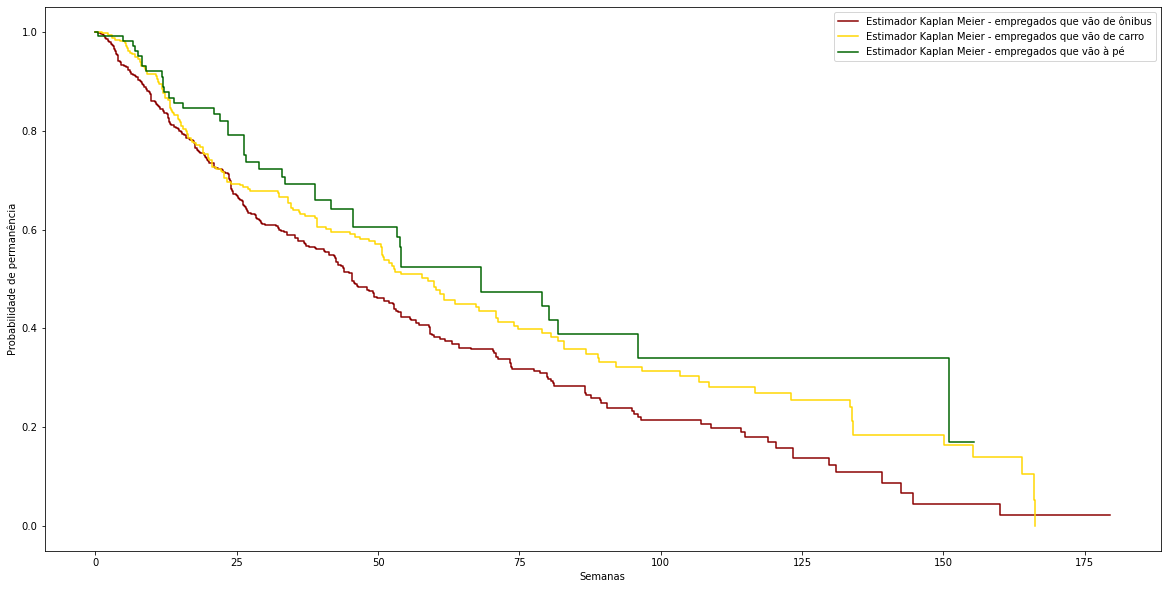

In [27]:
# treina estimador Kaplan Meier e plota o gráfico
kmf = KaplanMeierFitter()
fig, ax = plt.subplots(figsize=(20, 10))

cohort1 = df2[df2['way_bus'] == 1]
kmf.fit(cohort1.stag, cohort1.event,label='Estimador Kaplan Meier - empregados que vão de ônibus')
kmf.plot_survival_function(ax=ax,ci_show=False, color='darkred')

cohort2 = df2[df2['way_car'] == 1]
kmf.fit(cohort2.stag, cohort2.event,label='Estimador Kaplan Meier - empregados que vão de carro')
kmf.plot_survival_function(ax=ax,ci_show=False, color='gold')

cohort3 = df2[df2['way_foot'] == 1]
kmf.fit(cohort3.stag, cohort3.event,label='Estimador Kaplan Meier - empregados que vão à pé')
kmf.plot_survival_function(ax=ax,ci_show=False, color='darkgreen')

# inclui labels nos eixos
plt.xlabel('Semanas')
plt.ylabel('Probabilidade de permanência');

Por fim, neste gráfico podemos afirmar que, nesta empresa, os empregados que vão à pé ao trabalho têm uma probabilidade maior de permanecer na empresa por mais tempo e aqueles que vão de ônibus possuem uma probabilidade menor.

Além disso, podemos fazer essa mesma análise levando em consideração variáveis específicas, como, por exemplo, verificar somente os profissionais da área de TI dessa empresa.

In [28]:
# cria subset só com empregados da TI
features_ti = dataset[dataset.profession == 'IT'][['stag','event','age','extraversion','independ','selfcontrol','anxiety','novator']].copy()

features_ti

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
108,123.334702,1,22.0,4.6,4.8,6.4,7.1,6.0
109,123.334702,1,22.0,4.6,6.2,6.4,4.0,6.7
110,13.174538,1,28.0,8.6,6.2,1.0,5.6,6.7
111,13.174538,1,28.0,7.0,6.2,2.6,5.6,8.3
118,15.540041,1,38.0,6.2,4.1,1.8,8.7,8.3
...,...,...,...,...,...,...,...,...
1097,9.921971,0,20.0,9.4,4.8,2.6,4.8,9.0
1105,79.540041,0,34.0,3.8,5.5,6.4,4.0,4.4
1112,6.800821,0,31.0,7.8,3.4,1.8,8.7,6.7
1113,79.802875,0,34.0,3.8,5.5,6.4,4.0,4.4


In [29]:
# importa CoxPHFitter da biblioteca lifelines
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(features_ti, duration_col='stag', event_col='event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 74 total observations, 49 right-censored observations>
             duration col = 'stag'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 74
number of events observed = 25
   partial log-likelihood = -77.29
         time fit was run = 2021-11-29 01:32:30 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
age            0.04       1.05       0.04            -0.03             0.12                 0.97                 1.13
extraversion   0.07       1.07       0.19            -0.30             0.45                 0.74                 1.56
independ       0.16       1.17       0.16            -0.16             0.48                 0.85                 1.62
selfcontrol   -0.02       0.98       0.16            -0.34             0.30                 0.71                 1.35
anxiety        0.26       1.30       0.15            -0.04             0.56                 0.96                 1.74
novator        0.12       1.13       0.19            -0.25             0.50                 0.78                 1.65

                 z    p   -log2(p)
covariate                         
age           1.15 0.25       2.01
extraversion  0.37 0.71       0.49
independ      0.96 0.33       1.58
selfcontrol  -0.11 0.91       0.13
anxiety       1.72 0.09       3.55
novator       0.64 0.52       0.94
---
Concordance = 0.67
Partial AIC = 166.58
log-likelihood ratio test = 6.91 on 6 df
-log2(p) of ll-ratio test = 1.60

Agora, vamos fazer um gráfico limitando nosso escopo de análise por valor da covariável.

Podemos verificar somente aqueles empregados que obtiveram notas "0", "5" e "10" no exame de independência.

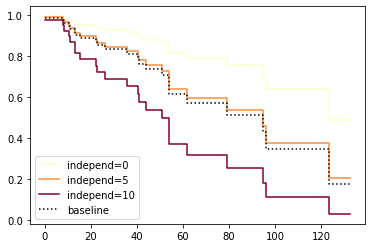

In [30]:
# plota gráfico de valores 0, 5 e 10 da variável independ
cph.plot_partial_effects_on_outcome(covariates='independ', values=[0,5,10], cmap='YlOrRd');

Podemos verificar também somente os empregados que possuem as idades "30", "40" e "50" anos.

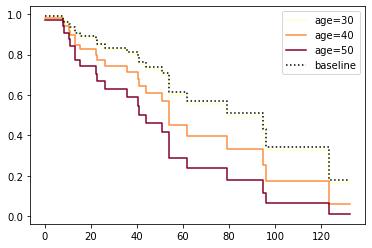

In [31]:
# plota gráfico de valores 30, 40 e 50 da variável age
cph.plot_partial_effects_on_outcome(covariates='age', values=[30,40,50], cmap='YlOrRd');

## 6. Previsão

Por fim, podemos verificar, daqueles empregados da TI que permaneceram na empresa ao término do estudo, qual é o tempo estimado restante de permanência na empresa (dado pela sobrevida mediana).

In [32]:
# filtra apenas os registros censurados (empregados de TI que permaneceram na empresa)
censored_employees = features_ti.loc[~features_ti['event'].astype(bool)]
censored_employees_last_obs = censored_employees['stag']

# prevê o tempo estimado restante de permanência para os registros censurados (empregados de TI que permaneceram na empresa)
prediction_remaining = censored_employees.copy()
prediction_remaining['median_remaining_lifetime'] = cph.predict_median(censored_employees, conditional_after=censored_employees_last_obs)
prediction_remaining.sort_values(['median_remaining_lifetime','stag'])

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator,median_remaining_lifetime
575,73.987680,0,33.0,7.0,6.2,3.3,6.3,7.5,22.373717
1096,90.907598,0,32.0,7.0,4.1,4.1,5.6,6.0,22.373717
753,52.271047,0,27.0,3.8,6.2,4.1,9.4,6.7,26.020534
406,48.459959,0,35.0,7.0,5.5,2.6,5.6,9.0,29.963039
927,93.897331,0,23.0,5.4,4.8,5.7,6.3,5.2,29.963039
717,18.924025,0,43.0,6.2,4.1,5.7,7.1,8.3,35.778234
841,19.121150,0,39.0,7.8,3.4,3.3,7.1,6.7,35.778234
764,5.158111,0,40.0,3.8,4.1,7.2,8.7,6.7,38.537988
1120,11.564682,0,41.0,5.4,4.1,4.9,7.9,7.5,38.537988
544,1.971253,0,31.0,6.2,4.1,2.6,8.7,8.3,40.114990


Cada registro acima representa um empregado, sendo que o tempo estimado restante na empresa está demonstrado na coluna *median_remaining_lifetime*.